<a href="https://colab.research.google.com/github/Vineelag2122/Eye_Disease_Detection_colab/blob/main/Eye_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vineelag2122","key":"e40d3ced140aff9b3426abe6ecbba30f"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
100% 732M/736M [00:11<00:00, 194MB/s]
100% 736M/736M [00:11<00:00, 66.9MB/s]


In [ ]:
!unzip eye-diseases-classification.zip -d /content/eye_diseases_dataset

Archive:  eye-diseases-classification.zip
  inflating: /content/eye_diseases_dataset/dataset/cataract/0_left.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/103_left.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1062_right.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1083_left.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1084_right.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1102_left.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1102_right.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1115_left.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1126_right.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/112_right.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1144_left.jpg  
  inflating: /content/eye_diseases_dataset/dataset/cataract/1144_right.jpg  
  inflating: /content/eye_diseases_dataset/da

In [ ]:
!ls /content/eye_diseases_dataset

dataset


In [ ]:
# Step 5: Import all required ML & preprocessing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

In [ ]:
# Step 6: Set the dataset path
dataset_path = "/content/eye_diseases_dataset/dataset"  # This points to the folder containing 4 disease categories.

In [ ]:
# Step 7: Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    shear_range=0.2

)   # We normalize images and add augmentation for better accuracy.

In [ ]:
# Step 8: Create training and validation dataset loaders
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)   # This loads 80% images for training.

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)   # This loads 20% images for validation.

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [ ]:
# Step 9: Load MobileNetV2 without top layers
base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights="imagenet")
# We use a pre-trained model to avoid training from scratch.

In [ ]:
# Unfreeze last 50 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

In [ ]:
# Step 11: Add our custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(4, activation="softmax")(x)   # 4 classes for 4 eye disease categories.

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(1e-5),   # <-- VERY IMPORTANT
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [ ]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3105 - loss: 1.5494

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.3115 - loss: 1.5473 - val_accuracy: 0.3389 - val_loss: 1.5125
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.6093 - loss: 0.9403 - val_accuracy: 0.3710 - val_loss: 1.6002
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 378s 3s/step - accuracy: 0.6769 - loss: 0.7881 - val_accuracy: 0.4007 - val_loss: 1.5220
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.7371 - loss: 0.6711 - val_accuracy: 0.4673 - val_loss: 1.4213
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.7466 - loss: 0.6537 - val_accuracy: 0.5042 - val_loss: 1.2979
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.7658 - loss: 0.5917 - val_accuracy: 0.5684 - val_loss: 1.1464
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.8058 - loss: 0.5312 - val_accuracy: 0.5898 - val_loss: 1.0947
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.7989 - loss: 0.5031 - val_accuracy: 0.637

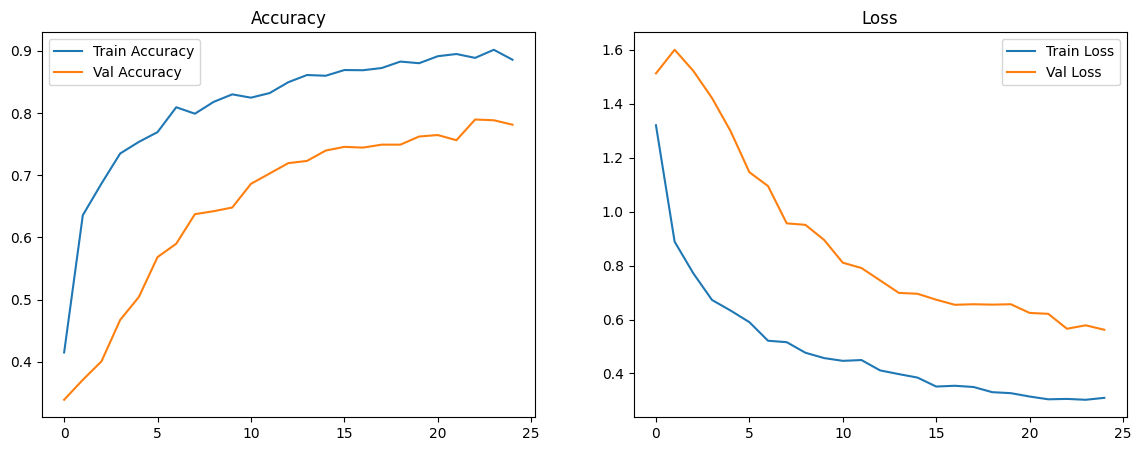

In [ ]:
# Step 14: Plot training progress
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_finetune.history["accuracy"], label="Train Accuracy")
plt.plot(history_finetune.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_finetune.history["loss"], label="Train Loss")
plt.plot(history_finetune.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()
# This visualizes how well the model is learning.

In [ ]:
print(f"Training Accuracy: {history_finetune.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history_finetune.history['val_accuracy'][-1]:.4f}")
history_finetune.history["accuracy"][-1], history_finetune.history["val_accuracy"][-1]

Training Accuracy: 0.8857
Validation Accuracy: 0.7812


(0.8856635093688965, 0.7812128663063049)

In [ ]:
# Step 15: Save the trained model
model.save("eye_disease_model.h5")
# This saves the model so you can use it later for prediction.

In [ ]:
train_generator.class_indices

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

Saving eye_dis_cc.jpg to eye_dis_cc.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Predicted Disease: normal


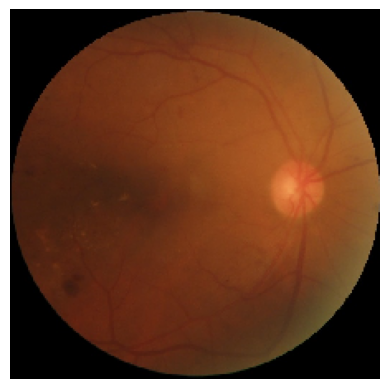

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

# Load model
model = tf.keras.models.load_model("eye_disease_model.h5", compile=False)

# Correct class order BASED ON train_generator.class_indices
class_names = ["cataract", "diabetic_retinopathy", "glaucoma", "normal"]

# Upload image
uploaded = files.upload()

for fn in uploaded.keys():

    img = image.load_img(fn, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    index = np.argmax(prediction)

    plt.imshow(img)
    plt.axis('off')

    print("\nPredicted Disease:", class_names[index])

In [ ]:
num_epochs = len(history_finetune.history['accuracy'])
print(f"The model was trained for {num_epochs} epochs.")

The model was trained for 25 epochs.
